In [15]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
dff=pd.read_csv('atlast_data.csv',index_col=0)
cor=dff.corr()
#cor=cor.drop(columns=['time','lon','lat'])
cor.drop(columns=['time','lon','lat'],axis=0)


,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
time,-0.415741,0.387441,-0.240323,-0.368899,-0.390421,-0.605185,0.826676,0.846596,-0.440903,0.224874,-0.222992,-0.080717
lon,-0.424547,0.030846,-0.461588,-0.207922,-0.254245,-0.258727,-0.042636,-0.032703,0.175312,0.085854,0.094838,-0.096535
lat,-0.188201,0.042263,-0.147747,-0.097050,-0.086878,-0.051185,-0.007945,0.002081,0.045270,-0.023346,0.340029,-0.002991
no2,1.000000,-0.521072,0.726618,0.624651,0.651734,0.751877,-0.277203,-0.243154,0.308719,-0.064895,-0.005493,0.074401
o3,-0.521072,1.000000,-0.059292,-0.308254,-0.297094,-0.510993,0.349467,0.175435,-0.673717,-0.169933,-0.075370,0.313442
so2,0.726618,-0.059292,1.000000,0.687509,0.715760,0.611125,-0.049439,-0.159459,-0.013148,-0.183186,-0.060192,0.199419
pm2.5,0.624651,-0.308254,0.687509,1.000000,0.989233,0.782036,-0.012987,-0.153268,0.282630,-0.116184,0.132733,-0.069917
pm10,0.651734,-0.297094,0.715760,0.989233,1.000000,0.777753,-0.032763,-0.179913,0.249959,-0.150461,0.143303,-0.046335
co,0.751877,-0.510993,0.611125,0.782036,0.777753,1.000000,-0.392282,-0.413195,0.439669,-0.085150,0.060516,-0.030763
tmax,-0.277203,0.349467,-0.049439,-0.012987,-0.032763,-0.392282,1.000000,0.876554,-0.353050,0.132974,-0.118298,-0.105003


In [16]:
chem=dff['so2']
features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','tysk','hum','tmax'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,chem,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)

r-squered for train 0.3191847455860898
r-squered for test 0.39000657984630294


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


            coef        p-value
const  29.311045   7.858064e-40
time   -0.015548   7.156311e-35
lon    -0.272219  1.244060e-140
lat    -0.394382   2.092887e-20
tmin    0.045039   3.882035e-11
opady  -0.048739   2.541438e-16
wind    0.129220   3.484868e-15


In [17]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)
vif=[variance_inflation_factor(exog=x_incl_const.values,exog_idx=i) for i in range(x_incl_const.shape[1])]
dd=pd.DataFrame({'coef_name': x_incl_const.columns,'vif':vif})
dd

,coef_name,vif
0,const,16053.155617
1,time,3.705657
2,lon,1.030872
3,lat,1.000965
4,tmin,4.024760
5,opady,1.183601
6,wind,1.018669


In [18]:
y_test_pred=regr.predict(X_test)
y_test_pred


array([ 1.20597256,  1.09590752,  2.18459692,  2.68886097,  2.38859169,
        0.90785906,  1.68132675,  1.77437363,  1.38239096,  1.10830411,
        1.5343716 ,  1.43434051,  1.16994864,  1.9433722 ,  2.06325471,
        1.22931853,  0.93542042,  1.92234092,  2.38974025,  2.1767382 ,
        2.43179957,  0.68289659,  2.76647274,  2.55843262,  1.34585506,
        2.2738827 ,  0.76781297,  1.56944269,  2.36540796,  1.59723177,
        2.42652897,  1.8472761 ,  0.99915531,  1.46209589,  1.30606452,
        2.09940342,  1.24550678,  2.26618949,  1.08909247,  2.05044853,
        1.97395121,  2.68937535,  1.91363882,  1.53784567,  2.74485129,
        2.06942144,  2.26701555,  0.76985183,  1.05837778,  2.00243081,
        1.51117195,  2.62312824,  0.61648279,  1.35145603,  1.84805892,
        2.66755465,  0.69248813,  1.31109785,  1.24943261,  2.24046096,
        1.24410625,  1.38777855,  2.12553478,  2.48188315,  1.03849998,
        1.5178492 ,  1.92703335,  1.1099112 ,  1.35845769,  0.51

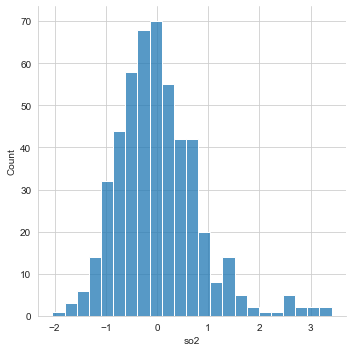

In [19]:
sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred

In [20]:
import scipy
scipy.stats.shapiro(y_for_gaus)

ShapiroResult(statistic=0.9474928379058838, pvalue=2.8357257948058434e-12)

In [21]:
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))

MAE 0.6034836607438885
MSE 0.6568832172945407
RMSE 0.8104833232673827


r-squered for train 0.6516949333193565
r-squered for test 0.6569622586786925
MAE 0.45492701400270297
MSE 0.36940682920123324
RMSE 0.6077884740608638


ShapiroResult(statistic=0.947702169418335, pvalue=3.0335165802919395e-12)

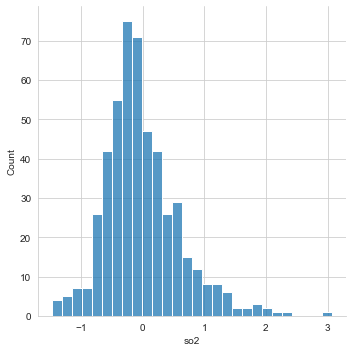

In [22]:
model=RandomForestRegressor(n_estimators=60,min_samples_leaf=5,max_depth=6,n_jobs=1)
model.fit(X_train,Y_train)
print("r-squered for train",model.score(X_train,Y_train))
print("r-squered for test",model.score(X_test,Y_test))
y_test_pred=model.predict(X_test)

sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred
scipy.stats.shapiro(y_for_gaus)
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))
scipy.stats.shapiro(y_for_gaus)